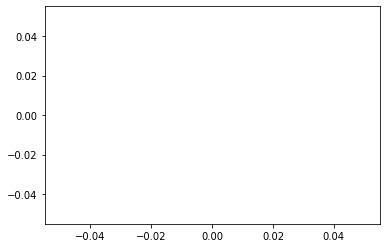

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.display import display, Markdown, Latex
import pickle

plt.plot()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)


from utils import PerfectSubstitutes, get_random_prob

In [2]:
prob = PerfectSubstitutes()

In [3]:
display(Latex(prob.general_setup()))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

{'x': 100.0, 'y': 0, 'xmax': 100.0, 'ymax': 50.0, 'U': 100.0}


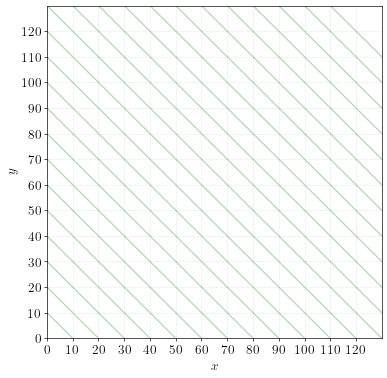

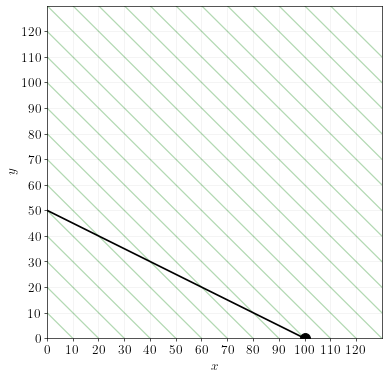

True

In [4]:
display(Latex(prob.setup()))
print(prob.sol)
prob.graph_with_IC(show=True)
prob.graph_with_IC(with_solution=True, show=True)

In [5]:
examples = []
n_found = 0
for xmax_i in np.arange(3,13):
    for ymax_i in np.arange(3,13):
        for gmax in [12, 24, 60, 120, 240]:
            for px in np.arange(1,11):
                I = xmax_i*(gmax/12)*px
                py = (xmax_i/ymax_i)*px
                for a in np.arange(1,4):
                    for b in np.arange(1,4):
                        params = {'I':I,'a':a,'b':b,'px':px,'py':py,'gmax':gmax}
                        prob = PerfectSubstitutes(params)
                        if prob.check_solution():
                            n_found+=1
                            examples.append( prob.params | prob.sol )
                            if (n_found%1000==0):
                                print(f"{n_found} examples found...")
                        params = {'I':I,'a':b,'b':a,'px':py,'py':px,'gmax':gmax}
                        prob = PerfectSubstitutes(params)
                        if prob.check_solution():
                            n_found+=1
                            examples.append( prob.params | prob.sol )
                            if (n_found%1000==0):
                                print(f"{n_found} examples found...")
examples = pd.DataFrame.from_dict(examples)
examples = examples.drop_duplicates()
examples.to_csv("PerfectSubstitutes_examples.csv", index=False, header=True)
print(f"{len(examples)} examples found.")

1000 examples found...
2000 examples found...
3000 examples found...
4000 examples found...
5000 examples found...
6000 examples found...
7000 examples found...
8000 examples found...
9000 examples found...
10000 examples found...
11000 examples found...
12000 examples found...
13000 examples found...
14000 examples found...
15000 examples found...
16000 examples found...
17000 examples found...
18000 examples found...
19000 examples found...
20000 examples found...
21000 examples found...
22000 examples found...
23000 examples found...
24000 examples found...
16020 examples found.


<IPython.core.display.Latex object>

{'x': 15.0, 'y': 0, 'xmax': 15.0, 'ymax': 35.0, 'U': 45.0}


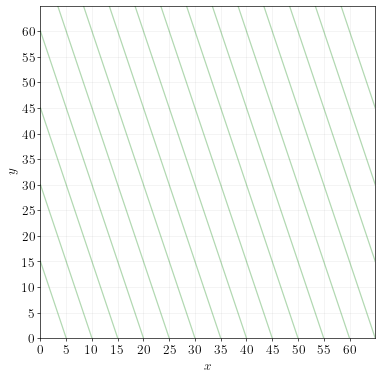

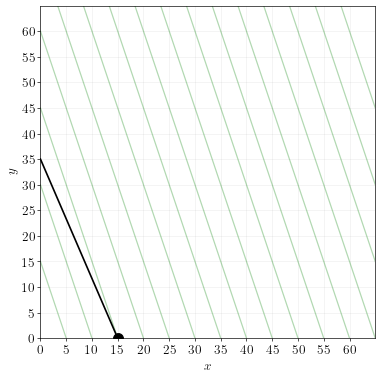

True

In [11]:
prob = get_random_prob(PerfectSubstitutes, "PerfectSubstitutes_examples.csv")
display(Latex(prob.setup()))
print(prob.sol)
prob.graph_with_IC(show=True)
prob.graph_with_IC(with_solution=True, show=True)

In [7]:
(examples['y']==0).value_counts()

False    8010
True     8010
Name: y, dtype: int64